## Datathon 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from scipy import stats
# from pandas_profiling import ProfileReport


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)

In [3]:
df = pd.read_csv('.\data\data-1.csv')

In [4]:
df.head()

,subject_id,hospital_expire_flag,deathtime,gender,anchor_age,dod,valuenum,valueuom,itemid,charttime,storetime,icu_intime,icu_outtime,aspirin,p2y12,other_antiplatelet,starttime,stoptime
0,10881690,0,NaN,F,74,NaN,4.9,g/dL,51222,25/4/2163 14:26,25/4/2163 15:20,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
1,10881690,0,NaN,F,74,NaN,4.8,g/dL,51222,25/4/2163 16:15,25/4/2163 16:48,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
2,10881690,0,NaN,F,74,NaN,8.6,g/dL,51222,25/4/2163 19:36,25/4/2163 20:16,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
3,10881690,0,NaN,F,74,NaN,9.0,g/dL,51222,25/4/2163 23:29,25/4/2163 23:58,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
4,10881690,0,NaN,F,74,NaN,8.2,g/dL,51222,26/4/2163 3:36,26/4/2163 4:18,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            245361 non-null  int64  
 1   hospital_expire_flag  245361 non-null  int64  
 2   deathtime             35338 non-null   object 
 3   gender                245361 non-null  object 
 4   anchor_age            245361 non-null  int64  
 5   dod                   91201 non-null   object 
 6   valuenum              245361 non-null  float64
 7   valueuom              245361 non-null  object 
 8   itemid                245361 non-null  int64  
 9   charttime             245361 non-null  object 
 10  storetime             245361 non-null  object 
 11  icu_intime            245361 non-null  object 
 12  icu_outtime           245361 non-null  object 
 13  aspirin               245361 non-null  int64  
 14  p2y12                 245361 non-null  int64  
 15  

<span style='color:red'>earliest starttime/stoptime where medication of interest (aspirin/blah blah) is '1' 
<br> itemid identifying for lab measurement for hemoglo... charttime</span>

(1) earliest time when itemid (aspirin/p2y12/other_antiplatelet)==1
<br> (2) earliest time when itemid (hemo)==1 

In [6]:
df.isnull().sum()

subject_id                   0
hospital_expire_flag         0
deathtime               210023
gender                       0
anchor_age                   0
dod                     154160
valuenum                     0
valueuom                     0
itemid                       0
charttime                    0
storetime                    0
icu_intime                   0
icu_outtime                  0
aspirin                      0
p2y12                        0
other_antiplatelet           0
starttime                    0
stoptime                    42
dtype: int64

In [7]:
pd.to_datetime(df['deathtime'])

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
245356   NaT
245357   NaT
245358   NaT
245359   NaT
245360   NaT
Name: deathtime, Length: 245361, dtype: datetime64[ns]

In [8]:
# makes no sense
df[df['dod'].notna()][['dod']]

,dod
76,23/9/2154
77,23/9/2154
78,23/9/2154
79,23/9/2154
80,23/9/2154
...,...
245155,20/2/2124
245156,20/2/2124
245157,20/2/2124
245158,20/2/2124


In [9]:
# convert to datetime
df['deathtime_dt'] = pd.to_datetime(df['deathtime'])
df['charttime_dt'] = pd.to_datetime(df['charttime'])
df['storetime_dt'] = pd.to_datetime(df['storetime'])
df['icu_intime_dt'] = pd.to_datetime(df['icu_intime'])
df['icu_outtime_dt'] = pd.to_datetime(df['icu_outtime'])
df['starttime_dt'] = pd.to_datetime(df['starttime'])
df['stoptime_dt'] = pd.to_datetime(df['stoptime'])

In [10]:
# double check datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   subject_id            245361 non-null  int64         
 1   hospital_expire_flag  245361 non-null  int64         
 2   deathtime             35338 non-null   object        
 3   gender                245361 non-null  object        
 4   anchor_age            245361 non-null  int64         
 5   dod                   91201 non-null   object        
 6   valuenum              245361 non-null  float64       
 7   valueuom              245361 non-null  object        
 8   itemid                245361 non-null  int64         
 9   charttime             245361 non-null  object        
 10  storetime             245361 non-null  object        
 11  icu_intime            245361 non-null  object        
 12  icu_outtime           245361 non-null  object        
 13 

In [11]:
# unique value
df['gender'].value_counts(normalize=True)

M    0.626836
F    0.373164
Name: gender, dtype: float64

In [12]:
# convert dod to mortality if value exists
df['mortality_dod'] = df['dod'].apply(lambda x: 0 if  x is np.nan else 1)

In [13]:
# convert deathtime to mortality if value exists
df['mortality_deathtime'] = df['deathtime'].apply(lambda x: 0 if  x is np.nan else 1)

In [14]:
# double check
df[df['mortality_dod']==1][['mortality_dod','dod']]

,mortality_dod,dod
76,1,23/9/2154
77,1,23/9/2154
78,1,23/9/2154
79,1,23/9/2154
80,1,23/9/2154
...,...,...
245155,1,20/2/2124
245156,1,20/2/2124
245157,1,20/2/2124
245158,1,20/2/2124


In [15]:
# double check
df[df['mortality_dod']==0][['mortality_dod','dod']]

,mortality_dod,dod
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
245356,0,NaN
245357,0,NaN
245358,0,NaN
245359,0,NaN


In [16]:
# check predicted
df[df['mortality_deathtime']==1][['mortality_deathtime','dod']]

,mortality_deathtime,dod
76,1,23/9/2154
77,1,23/9/2154
78,1,23/9/2154
79,1,23/9/2154
80,1,23/9/2154
...,...,...
244569,1,25/1/2118
244570,1,25/1/2118
244571,1,25/1/2118
244572,1,25/1/2118


In [17]:
df['mortality_dod'].value_counts(normalize=True)

0    0.628299
1    0.371701
Name: mortality_dod, dtype: float64

In [18]:
df['mortality_deathtime'].value_counts(normalize=True)

0    0.855975
1    0.144025
Name: mortality_deathtime, dtype: float64

### numerical data

In [19]:
# num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df = df[['anchor_age','valuenum']]

In [20]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   anchor_age  245361 non-null  int64  
 1   valuenum    245361 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.7 MB


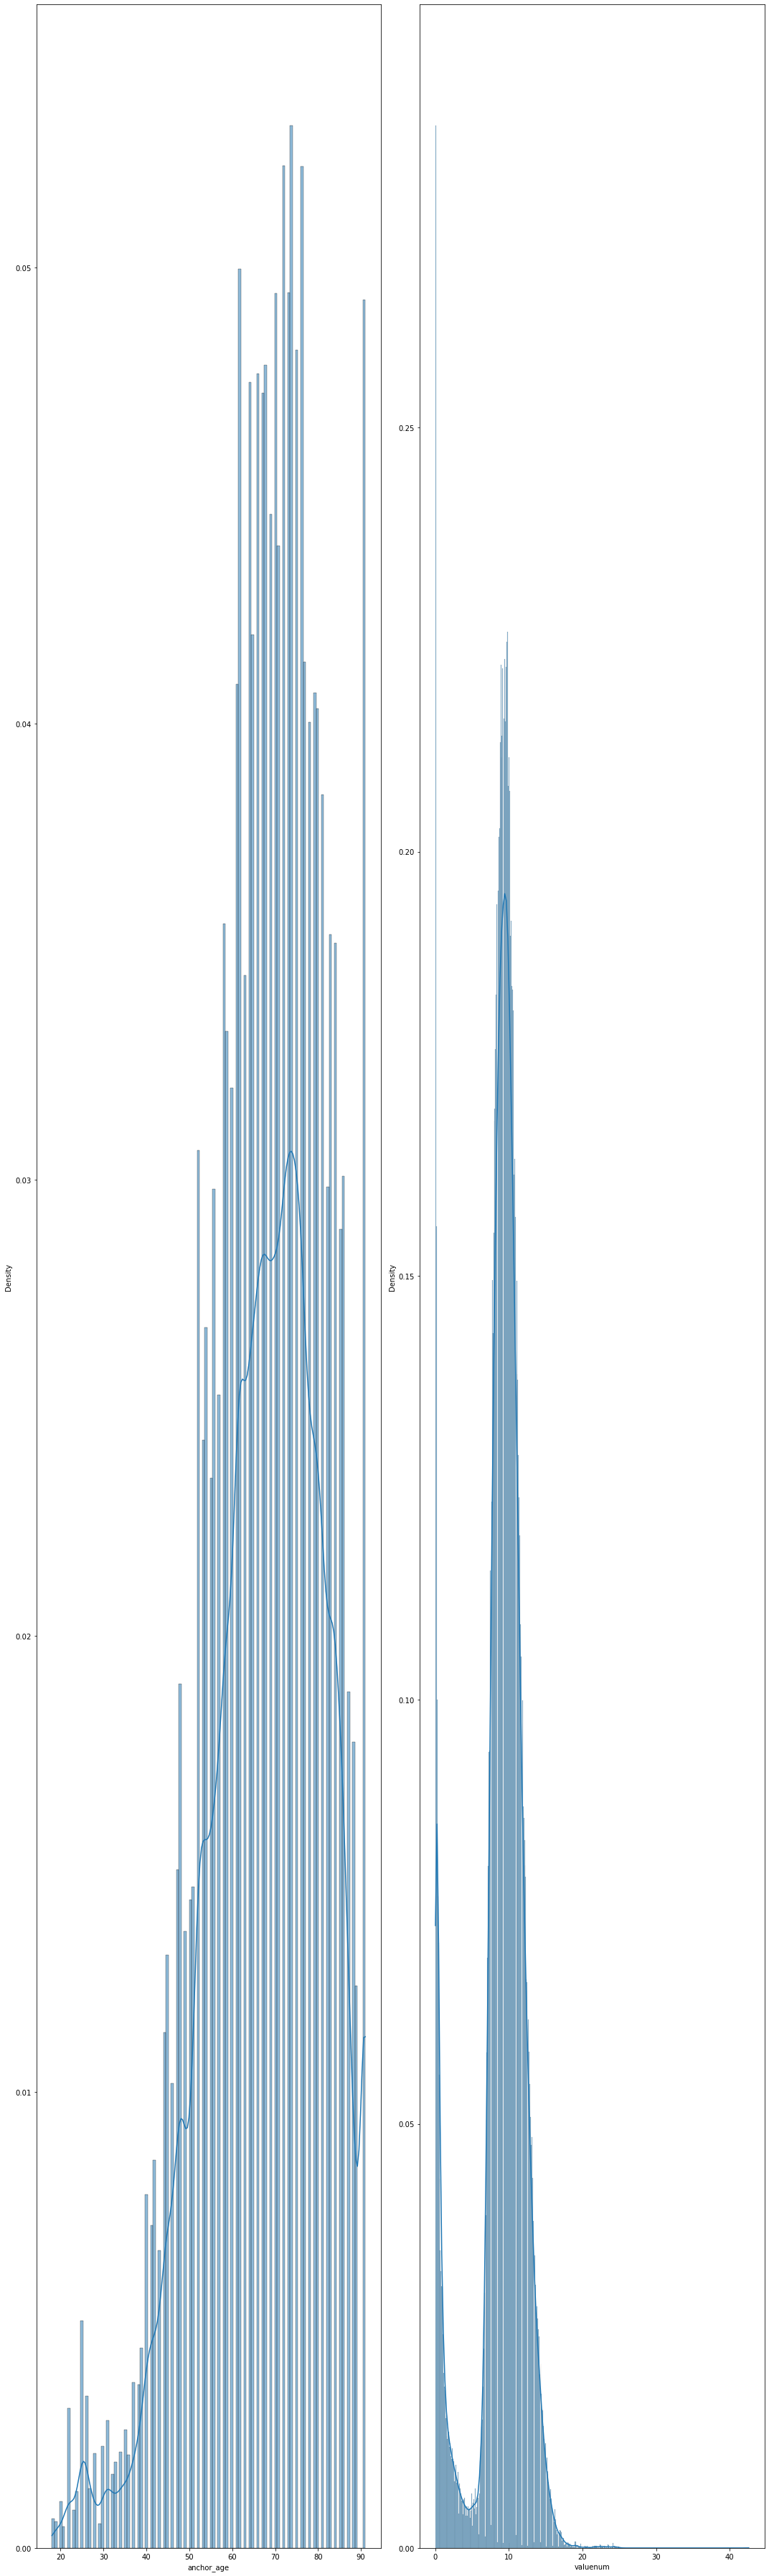

In [21]:
# plot overview distributions of numerical variables
# determining number of columns
ncols = 2
cols = num_df.columns

# determining number of rows
nrows = round(int(np.ceil(len(num_df.columns)) / (1.0*ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15,50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=num_df[col], kde=True, stat='density', ax=ax)

plt.tight_layout();

**anchor_age**

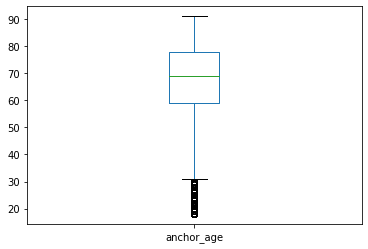

In [22]:
df.boxplot(column =['anchor_age'], grid = False);

In [23]:
df['anchor_age'].describe()

count    245361.000000
mean         67.736246
std          13.454805
min          18.000000
25%          59.000000
50%          69.000000
75%          78.000000
max          91.000000
Name: anchor_age, dtype: float64

**valuenum**

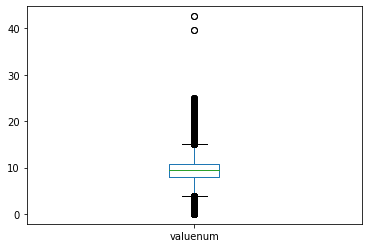

In [24]:
df.boxplot(column =['valuenum'], grid = False);

In [25]:
df['valuenum'].describe()

count    245361.000000
mean          8.850248
std           3.434529
min           0.010000
25%           8.000000
50%           9.400000
75%          10.800000
max          42.600000
Name: valuenum, dtype: float64

### categorical data

In [26]:
# select only categorical columns
nom_df = df.select_dtypes(include='object').copy()

In [27]:
nom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   deathtime    35338 non-null   object
 1   gender       245361 non-null  object
 2   dod          91201 non-null   object
 3   valueuom     245361 non-null  object
 4   charttime    245361 non-null  object
 5   storetime    245361 non-null  object
 6   icu_intime   245361 non-null  object
 7   icu_outtime  245361 non-null  object
 8   starttime    245361 non-null  object
 9   stoptime     245319 non-null  object
dtypes: object(10)
memory usage: 18.7+ MB


In [28]:
nom_df['gender'].value_counts(normalize=True)

M    0.626836
F    0.373164
Name: gender, dtype: float64

### earliest time when itemid (drug)==1
<br> itemid (aspirin/p2y12/other_antiplatelet)==1

##### aspirin

In [29]:
# number of subjects
df['subject_id'].nunique()

16420

In [30]:
df[(df['subject_id']==10000980) & df['aspirin']==1][['starttime_dt']].iloc[0]

starttime_dt   2189-06-27 11:00:00
Name: 38090, dtype: datetime64[ns]

In [31]:
aspirin_starttime_df = df[df['aspirin']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','aspirin','starttime_dt']]
aspirin_starttime_df.head(10)

,subject_id,aspirin,starttime_dt
0,10000980,1,2189-06-27 11:00:00
1,10002013,1,2160-05-19 10:00:00
2,10002430,1,2129-06-13 04:00:00
3,10002495,1,2141-05-23 08:00:00
4,10002527,1,2136-03-25 10:00:00
5,10002760,1,2141-04-21 10:00:00
6,10003502,1,2169-08-27 04:00:00
7,10004422,1,2111-01-18 10:00:00
8,10004457,1,2141-12-18 10:00:00
9,10004733,1,2174-05-12 08:00:00


##### p2y12

In [32]:
df[(df['subject_id']==10000980) & df['p2y12']==1][['starttime_dt']].iloc[0]

starttime_dt   2189-06-27 11:00:00
Name: 366, dtype: datetime64[ns]

In [33]:
p2y12_starttime_df = df[df['p2y12']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','p2y12','starttime_dt']]
p2y12_starttime_df.head(10)

,subject_id,p2y12,starttime_dt
0,10000980,1,2189-06-27 11:00:00
1,10002013,1,2160-05-19 10:00:00
2,10002495,1,2141-05-27 06:00:00
3,10008077,1,2191-06-03 08:00:00
4,10013310,1,2153-07-05 08:00:00
5,10013643,1,2200-02-10 08:00:00
6,10015931,1,2176-11-20 08:00:00
7,10019385,1,2180-02-22 08:00:00
8,10022281,1,2125-06-17 10:00:00
9,10023771,1,2113-08-27 10:00:00


##### other_antiplatelet

In [34]:
df[(df['subject_id']==10881690) & df['other_antiplatelet']==1][['starttime_dt']].iloc[0]

starttime_dt   2163-04-25 13:00:00
Name: 0, dtype: datetime64[ns]

In [35]:
other_antiplatelet_starttime_df = df[df['other_antiplatelet']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','other_antiplatelet','starttime_dt']]
other_antiplatelet_starttime_df.head(10)

,subject_id,other_antiplatelet,starttime_dt
0,10881690,1,2163-04-25 12:00:00
1,12588030,1,2129-10-12 20:00:00
2,12662064,1,2112-04-01 20:00:00
3,12859888,1,2121-01-03 06:00:00
4,13660560,1,2154-09-22 18:00:00
5,13993123,1,2146-07-25 20:00:00
6,14391747,1,2155-10-11 20:00:00
7,14837844,1,2119-10-21 21:00:00
8,15904250,1,2123-10-10 08:00:00
9,16644308,1,2189-03-29 16:00:00


### earliest time itemid (hemoglobin)==1
itemid = 51002 OR itemid = 51003 OR itemid = 52642 (troponin)
<br> itemid = 51222 (hemoglobin)

In [36]:
hemo_charttime_df = df[df['itemid']==51222].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','itemid','charttime_dt']]
hemo_charttime_df.head(10)

,subject_id,itemid,charttime_dt
0,10002013,51222,2160-05-18 13:01:00
1,10002430,51222,2129-06-13 00:48:00
2,10002495,51222,2141-05-22 21:23:00
3,10002527,51222,2136-03-24 15:26:00
4,10002760,51222,2141-04-20 13:30:00
5,10003502,51222,2169-08-27 05:51:00
6,10004422,51222,2111-01-17 13:55:00
7,10004457,51222,2141-12-17 13:30:00
8,10004733,51222,2174-04-12 13:01:00
9,10004764,51222,2168-12-04 11:31:00


### earliest time itemid (troponin) consecutive > 20%

In [37]:
df['itemid'].unique()

array([51222, 51003], dtype=int64)

In [38]:
df[(df['subject_id']==12588030) & (df['itemid']==51003)][['subject_id','valuenum','charttime_dt']].sort_values(by=['subject_id','charttime_dt']).drop_duplicates(subset=['subject_id','charttime_dt'],keep='first')

,subject_id,valuenum,charttime_dt
36,12588030,4.42,2129-10-12 12:41:00
38,12588030,6.39,2129-10-12 20:00:00
39,12588030,7.51,2129-11-12 04:00:00
43,12588030,8.78,2129-12-13 05:40:00


In [39]:
trop_inc_df = df[(df['itemid']==51003)][['subject_id','valuenum','charttime_dt']].sort_values(by=['subject_id','charttime_dt']).drop_duplicates(subset=['subject_id','charttime_dt'],keep='first')
trop_inc_df.head(10)

,subject_id,valuenum,charttime_dt
366,10000980,0.11,2189-06-27 12:58:00
370,10002495,0.69,2141-05-22 21:23:00
372,10002495,0.84,2141-05-23 01:49:00
373,10002495,1.75,2141-05-23 05:48:00
375,10002495,3.11,2141-05-23 10:52:00
377,10002495,3.75,2141-05-23 16:57:00
380,10002495,6.74,2141-05-24 06:20:00
38130,10003502,0.13,2169-08-27 05:51:00
38198,10007058,0.70,2167-08-11 00:19:00
38200,10007058,1.37,2167-08-11 03:58:00


In [47]:
trop_inc_df['charttime_diff'] = trop_inc_df['charttime_dt'].diff().dt.seconds.div(3600)
trop_inc_df['trop_pct'] = trop_inc_df['valuenum'].pct_change()

In [48]:
trop_inc_df.head(10)

,subject_id,valuenum,charttime_dt,charttime_diff,trop_pct
366,10000980,0.11,2189-06-27 12:58:00,NaN,NaN
370,10002495,0.69,2141-05-22 21:23:00,8.416667,5.272727
372,10002495,0.84,2141-05-23 01:49:00,4.433333,0.217391
373,10002495,1.75,2141-05-23 05:48:00,3.983333,1.083333
375,10002495,3.11,2141-05-23 10:52:00,5.066667,0.777143
377,10002495,3.75,2141-05-23 16:57:00,6.083333,0.205788
380,10002495,6.74,2141-05-24 06:20:00,13.383333,0.797333
38130,10003502,0.13,2169-08-27 05:51:00,23.516667,-0.980712
38198,10007058,0.70,2167-08-11 00:19:00,18.466667,4.384615
38200,10007058,1.37,2167-08-11 03:58:00,3.650000,0.957143


In [49]:
trop_inc_df[trop_inc_df['charttime_diff'] <= (12)]

,subject_id,valuenum,charttime_dt,charttime_diff,trop_pct
370,10002495,0.69,2141-05-22 21:23:00,8.416667,5.272727
372,10002495,0.84,2141-05-23 01:49:00,4.433333,0.217391
373,10002495,1.75,2141-05-23 05:48:00,3.983333,1.083333
375,10002495,3.11,2141-05-23 10:52:00,5.066667,0.777143
377,10002495,3.75,2141-05-23 16:57:00,6.083333,0.205788
...,...,...,...,...,...
244959,19993336,1.00,2171-07-09 10:43:00,7.033333,-0.107143
245154,19997293,0.08,2123-10-14 17:00:00,8.750000,-0.836735
245156,19997293,0.07,2123-10-15 02:02:00,9.033333,-0.125000
38080,19997473,3.08,2173-09-14 04:56:00,6.100000,-0.012821


### final df

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   subject_id            245361 non-null  int64         
 1   hospital_expire_flag  245361 non-null  int64         
 2   deathtime             35338 non-null   object        
 3   gender                245361 non-null  object        
 4   anchor_age            245361 non-null  int64         
 5   dod                   91201 non-null   object        
 6   valuenum              245361 non-null  float64       
 7   valueuom              245361 non-null  object        
 8   itemid                245361 non-null  int64         
 9   charttime             245361 non-null  object        
 10  storetime             245361 non-null  object        
 11  icu_intime            245361 non-null  object        
 12  icu_outtime           245361 non-null  object        
 13 

In [45]:
# df['subject_id','gender','anchor_age','mortality_dod','mortality_death_time']

#### export final dataset

In [46]:
# final_df.to_csv('.\data\final_df.csv')